<a href="https://colab.research.google.com/github/ShamankaA/math_prog/blob/main/5.%20%D0%90%D1%80%D1%85%D0%B8%D1%82%D0%B5%D0%BA%D1%82%D1%83%D1%80%D1%8B%20%D0%A1%D0%9D%D0%A1%20%D0%B8%20Transfer%20Learning/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%965_%D0%90%D1%80%D1%85%D0%B8%D1%82%D0%B5%D0%BA%D1%82%D1%83%D1%80%D1%8B_%D0%9D%D0%A1_%D0%B8_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1. Использование предобученной модели

### 1.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [1]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
import os

model = ResNet50(weights='imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### 1.2. Загрузите из сети Интернет 5 изображений с разными классами, из тех, что приведены в [списке](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), и сохраните их представление в список images

Успешно загружено 5 изображений


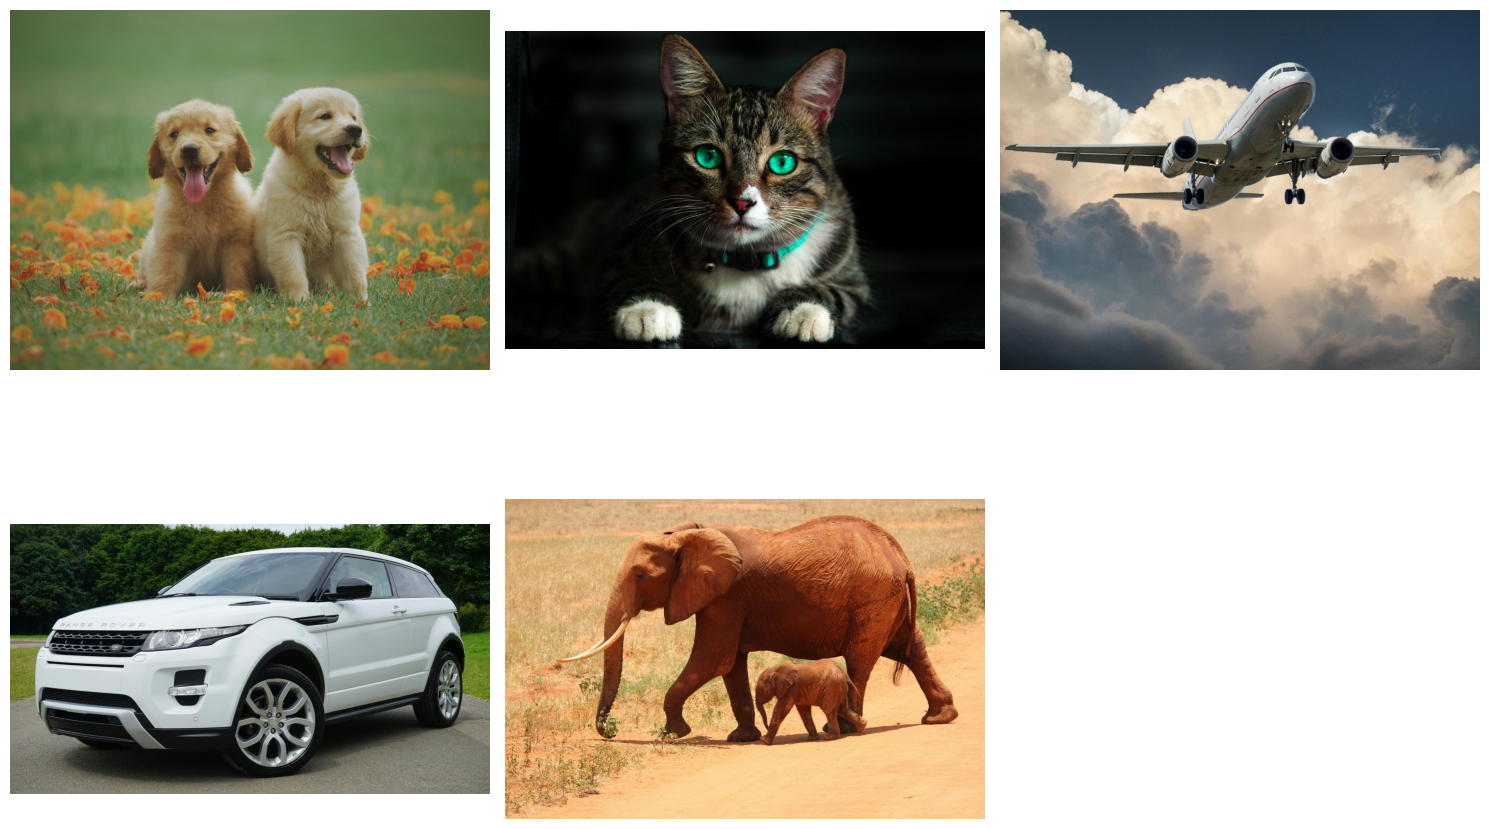

In [5]:
import requests
from PIL import Image
from io import BytesIO

# Обновленные рабочие URL из разных источников
urls = [
    # Собака
    'https://images.pexels.com/photos/1108099/pexels-photo-1108099.jpeg',
    # Кошка
    'https://images.pexels.com/photos/617278/pexels-photo-617278.jpeg',
    # Самолет
    'https://images.pexels.com/photos/46148/aircraft-jet-landing-cloud-46148.jpeg',
    # Автомобиль
    'https://images.pexels.com/photos/116675/pexels-photo-116675.jpeg',
    # Слон
    'https://images.pexels.com/photos/66898/elephant-cub-tsavo-kenya-66898.jpeg'
]

images = []
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

for url in urls:
    try:
        response = requests.get(url, headers=headers, stream=True, timeout=15)
        response.raise_for_status()

        img = Image.open(BytesIO(response.content))
        images.append(img.copy())
        img.close()
    except Exception as e:
        print(f"Ошибка при загрузке изображения {url}: {str(e)}")
        images.append(None)

# Фильтрация неудачных загрузок
images = [img for img in images if img is not None]

# Проверка результата
print(f"Успешно загружено {len(images)} изображений")

# Визуализация загруженных изображений
if len(images) > 0:
    plt.figure(figsize=(15,10))
    for i, img in enumerate(images):
        plt.subplot(2,3,i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Не удалось загрузить ни одного изображения")

### 1.3. Напишите функцию, принимающую на вход список с исходными изображениями и возвращающую список с преобразованными изображениями под формат входных данных выбранной Вами модели СНС (нормализация).

(Не забудьте создать независимую копию исходного списка в теле функции, для обработки именно независимой копии, а не оригинального списка)

In [6]:
def preprocess_images(input_images):
    processed_images = [img.copy() for img in input_images]
    return [preprocess_input(image.img_to_array(img.resize((224, 224)))) for img in processed_images]

### 1.5. Выведите изображения и соответствующие им классы (как в примере из теории)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


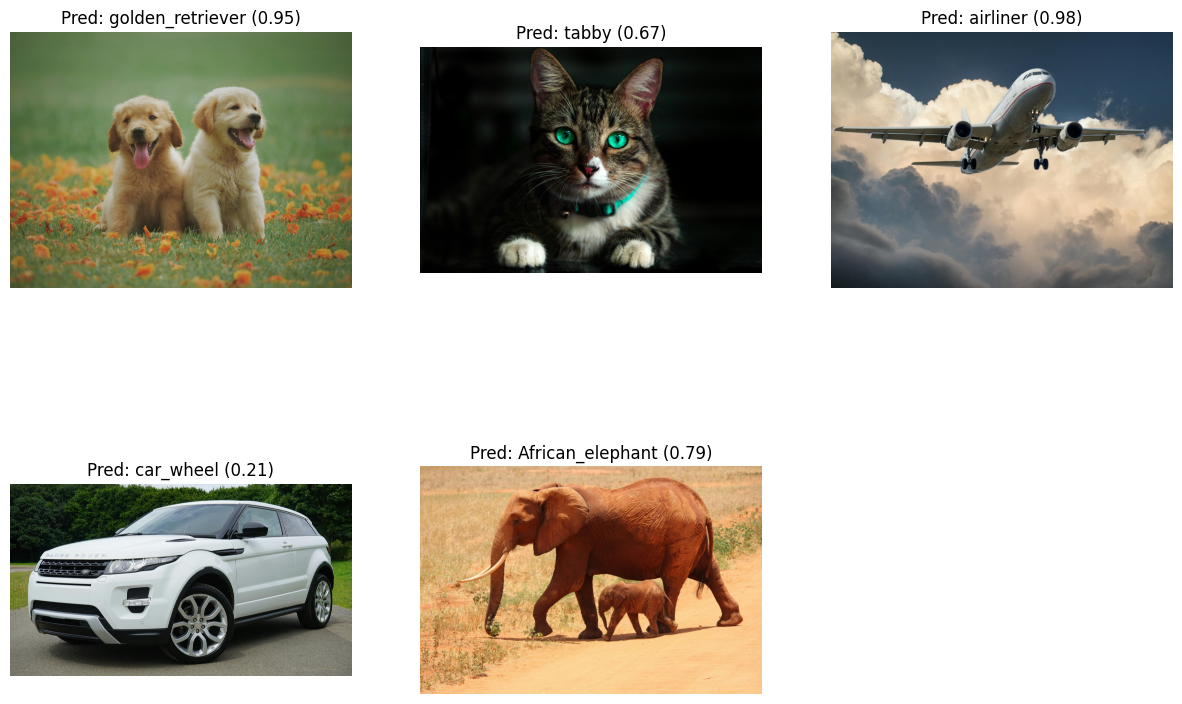

In [7]:
processed_images = preprocess_images(images)
preds = model.predict(np.array(processed_images))
decoded_preds = decode_predictions(preds, top=1)

plt.figure(figsize=(15,10))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.title(f"Pred: {decoded_preds[i][0][1]} ({decoded_preds[i][0][2]:.2f})")
    plt.axis('off')
plt.show()

# Задание 2. Использование обученной модели для работы со своим датасетом

### 2.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [8]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import tensorflow as tf

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 2.2. Подготовка тренировочных данных. Разделение на обучающую и тестовую выборку

In [9]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
!tar -xzf flower_photos.tgz

train_ds = tf.keras.utils.image_dataset_from_directory(
    'flower_photos',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32)

val_ds = tf.keras.utils.image_dataset_from_directory(
    'flower_photos',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32)

--2025-05-13 22:15:56--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 74.125.142.207, 74.125.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M   139MB/s    in 1.6s    

2025-05-13 22:15:58 (139 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


### 2.3. Обучение своей модели на основе предобученной модели "*название модели, выбранной в п.2.1.*"

In [31]:
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25
)

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.3770 - loss: 1.5902 - val_accuracy: 0.5218 - val_loss: 1.1761
Epoch 2/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.5991 - loss: 1.0473 - val_accuracy: 0.5000 - val_loss: 1.2517
Epoch 3/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.6384 - loss: 0.9572 - val_accuracy: 0.5899 - val_loss: 1.0565
Epoch 4/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 271s 3s/step - accuracy: 0.6703 - loss: 0.8688 - val_accuracy: 0.5995 - val_loss: 1.0327
Epoch 5/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.6981 - loss: 0.7871 - val_accuracy: 0.5477 - val_loss: 1.2700
Epoch 6/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.7053 - loss: 0.7949 - val_accuracy: 0.5858 - val_loss: 1.0899
Epoch 7/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.7548 - loss: 0.6935 - val_accuracy: 0.6294 - val_loss: 1.0069
Epoch 8/25
92/92 ━━━━━━━━━━━━━━━━━━━

### 2.4. Визуализация процесса обучения модели

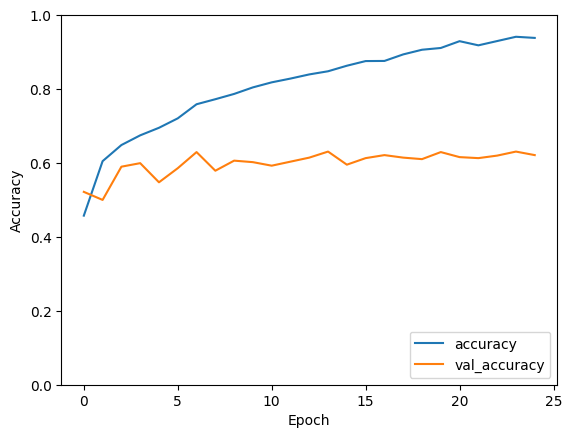

In [32]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

### 2.5. Подготовьте набор проверочных данных (examples)

In [33]:
examples = [image.img_to_array(img.resize((224, 224))) for img in images[:3]]

### 2.6. Реализуйте графический интерфейс для взаимодействия с обученной моделью, используя [Gradio](https://www.gradio.app/guides/image-classification-in-tensorflow). В качестве примеров (параметр examples в Gradio), используйте изображения из списка images (п.1.2.)

In [34]:
!pip install gradio

import gradio as gr
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Функция классификации
def classify_image(img):
    try:
        # Преобразование изображения
        img = img.resize((224, 224))
        img_array = image.img_to_array(img)
        img_array = preprocess_input(np.expand_dims(img_array, axis=0))

        # Предсказание
        preds = model.predict(img_array)
        return {class_names[i]: float(preds[0][i]) for i in range(len(class_names))}
    except Exception as e:
        return {"Ошибка": str(e)}

# Создание интерфейса
interface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil", label="Загрузите изображение цветка"),
    outputs=gr.Label(num_top_classes=3, label="Результаты классификации"),
    title="Классификатор цветов",
    description="Загрузите изображение цветка для классификации",
    allow_flagging="never"
)

interface.launch(share=True)

/usr/local/lib/python3.11/dist-packages/gradio/interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://02197a3a2490b348dd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Задание 3. Классификация набора пространственных данных EuroSat (для магистров)

- Ссылка на датасет: https://github.com/phelber/eurosat

- Описание на kaggle: https://www.kaggle.com/datasets/apollo2506/eurosat-dataset

В этом задании Вам будет предоставлен набор данных EuroSat, который содержит снимки земной поверхности, снятые спутником Sentinel-2. Вам нужно будет обучить модель для классификации этих изображений на 10 классов, представляющих различные типы земного покрова.

### **3.1. Загрузка данных:**
  * [Скачайте](https://madm.dfki.de/files/sentinel/EuroSAT.zip) набор данных EuroSat
  * Разделите данные на обучающую, валидационную и тестовую выборки.



In [ ]:
# Ваш код

### **3.2. Выбор архитектуры нейронной сети:**
  * Выберите архитектуру нейронной сети, основанную на трансферном обучении, например, ResNet50, VGG16 или InceptionV3 ([полный список](https://keras.io/api/applications/)).
  * Загрузите предобученную модель выбранной архитектуры.


In [ ]:
# Ваш код

### **3.3. Дообучение модели:**
  * Добавьте к предобученной модели несколько слоев для классификации изображений EuroSat.
  * Обучите модель на обучающей выборке.

In [ ]:
# Ваш код



### **3.4. Оценка модели:**
  * Оцените производительность модели на валидационной и тестовой выборках.
  * Сравните результаты с другими архитектурами нейронных сетей.



In [ ]:
# Ваш код

### **3.5. Анализ результатов:**
  * Проанализируйте влияние различных параметров на производительность модели, таких как:
      * Количество эпох обучения
      * Размер пакета
      * Функция активации
      * Оптимизатор
      * Регуляризация

-----------------------------------------
**Ваш вывод**
-----------------------------------------
